In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\input_layer_4_6_11_4.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\output_layer_4_6_11_4.pickle','rb') as file:
    output_data = pickle.load(file)
print(output_data.shape)
#output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)
(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, input_shape = [24], activation = 'relu'),
    #tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 90, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/90
100000/100000 - 3s - loss: 0.2394 - accuracy: 0.9030 - val_loss: 0.2080 - val_accuracy: 0.9153
Epoch 2/90
100000/100000 - 2s - loss: 0.2012 - accuracy: 0.9159 - val_loss: 0.1928 - val_accuracy: 0.9165
Epoch 3/90
100000/100000 - 2s - loss: 0.1799 - accuracy: 0.9202 - val_loss: 0.1681 - val_accuracy: 0.9224
Epoch 4/90
100000/100000 - 2s - loss: 0.1501 - accuracy: 0.9297 - val_loss: 0.1381 - val_accuracy: 0.9353
Epoch 5/90
100000/100000 - 2s - loss: 0.1256 - accuracy: 0.9413 - val_loss: 0.1200 - val_accuracy: 0.9442
Epoch 6/90
100000/100000 - 2s - loss: 0.1066 - accuracy: 0.9515 - val_loss: 0.1058 - val_accuracy: 0.9514
Epoch 7/90
100000/100000 - 2s - loss: 0.0951 - accuracy: 0.9573 - val_loss: 0.0940 - val_accuracy: 0.9578
Epoch 8/90
100000/100000 - 2s - loss: 0.0858 - accuracy: 0.9621 - val_loss: 0.0861 - val_accuracy: 0.9625
Epoch 9/90
100000/100000 - 2s - loss: 0.0761 - accuracy: 0.9672 - val_loss: 0.0824 - val_accuracy: 0.9

Epoch 78/90
100000/100000 - 2s - loss: 0.0178 - accuracy: 0.9922 - val_loss: 0.0502 - val_accuracy: 0.9830
Epoch 79/90
100000/100000 - 2s - loss: 0.0182 - accuracy: 0.9922 - val_loss: 0.0447 - val_accuracy: 0.9850
Epoch 80/90
100000/100000 - 2s - loss: 0.0162 - accuracy: 0.9928 - val_loss: 0.0486 - val_accuracy: 0.9840
Epoch 81/90
100000/100000 - 2s - loss: 0.0158 - accuracy: 0.9930 - val_loss: 0.0459 - val_accuracy: 0.9848
Epoch 82/90
100000/100000 - 2s - loss: 0.0175 - accuracy: 0.9925 - val_loss: 0.0522 - val_accuracy: 0.9838
Epoch 83/90
100000/100000 - 2s - loss: 0.0184 - accuracy: 0.9921 - val_loss: 0.0457 - val_accuracy: 0.9851
Epoch 84/90
100000/100000 - 2s - loss: 0.0158 - accuracy: 0.9930 - val_loss: 0.0490 - val_accuracy: 0.9840
Epoch 85/90
100000/100000 - 2s - loss: 0.0207 - accuracy: 0.9916 - val_loss: 0.0487 - val_accuracy: 0.9848
Epoch 86/90
100000/100000 - 2s - loss: 0.0154 - accuracy: 0.9932 - val_loss: 0.0467 - val_accuracy: 0.9854
Epoch 87/90
100000/100000 - 2s - loss

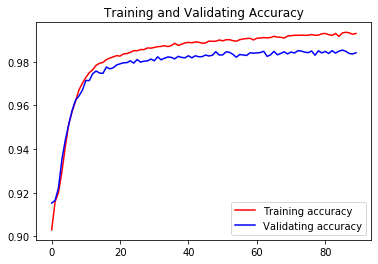

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Better_of_Two\\Better_of_Two_4_6_11_4_model.h5')